In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import time

In [8]:
data_path = os.path.join(os.getcwd(), '..', '..', 'data', 'preprocessed_data.csv')

In [9]:
df = pd.read_csv(data_path)
df.head()

,property_name,room_id,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,...,beachfront,building_staff,lat,lng,booking_window,stay_duration_in_days,avg_rating,avg_review_sentiment_score,rating_count,average_daily_rate
0,Bingin Ombak,431874,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,81,4,4.3158,0.565051,19,1.477799e+06
1,Bingin Ombak,431875,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,81,4,4.0857,0.518720,35,1.477799e+06
2,Bingin Ombak,396658,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,81,4,4.0857,0.518720,35,1.477799e+06
3,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,81,4,4.5342,0.678392,164,1.477799e+06
4,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,81,4,4.5342,0.678392,164,1.477799e+06


## Prepare the data

In [10]:
X = df.drop(columns=['property_name', 'room_id', 'average_daily_rate'])
y = df['average_daily_rate']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

In [12]:
start = time.time()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = model.fit(X_train, 
          y_train, 
          epochs=100,
          batch_size=32,
          validation_data=(X_test, y_test))

stop = time.time()
runtime = stop - start

Epoch 1/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 364036.9062 - mean_absolute_error: 364036.9062 - val_loss: 230956.3438 - val_mean_absolute_error: 230956.3438
Epoch 2/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - loss: 249879.9688 - mean_absolute_error: 249879.9688 - val_loss: 223156.6875 - val_mean_absolute_error: 223156.6875
Epoch 3/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - loss: 237088.3906 - mean_absolute_error: 237088.3906 - val_loss: 202200.4375 - val_mean_absolute_error: 202200.4375
Epoch 4/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - loss: 214412.3281 - mean_absolute_error: 214412.3281 - val_loss: 183361.9844 - val_mean_absolute_error: 183361.9844
Epoch 5/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - loss: 206579.7188 - mean_absolute_error: 206579.7188 - val_loss: 178806.4531 - val_mean_absolute_error: 178806.4531
Epoch 6/100
1418/1418 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step - loss: 201652.9844 - mean_absolute_error: 201652.9844 - val_loss: 176

In [13]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
95,174112.171875,174112.171875,152647.046875,152647.046875,95
96,174319.812500,174319.812500,150366.156250,150366.156250,96
97,173794.062500,173794.062500,153994.640625,153994.640625,97
98,173309.218750,173309.218750,149193.765625,149193.765625,98
99,173703.328125,173703.328125,148304.437500,148304.437500,99


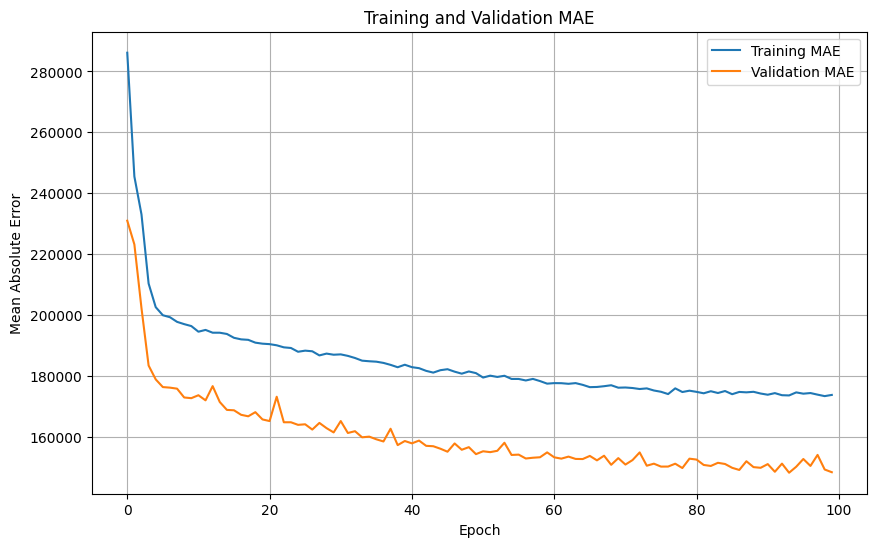

Training Runtime: 139.23788261413574


In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Training MAE')
plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

print(f'Training Runtime: {runtime}')